In [1]:
library("deMULTIplex")
library("ggplot2")

In [2]:
## Define vectors for reference barcode sequences and cell IDs
cell.id.vec <- read.table("barcodes_gmp.csv", sep = ",")[,"V2"]
cell.id.vec <- cell.id.vec[2: length(cell.id.vec)]
bar.ref <- read.table("LMOlist.csv", sep = ",")[,"V1"]

In [5]:
# Fails if you run umi = c(17, 28) instead of c(17, 28) like tutorial


readTable1 <- MULTIseq.preProcess(R1 = '200630Van/10x-4585G/mkfastq/outs/fastq_path/D20-3241_S2_L001_R1_001.fastq.gz', 
                                 R2 = '200630Van/10x-4585G/mkfastq/outs/fastq_path/D20-3241_S2_L001_R2_001.fastq.gz', 
                                 cellIDs = cell.id.vec, cell=c(1,16), umi=c(17,26), tag=c(1,8))

readTable2 <- MULTIseq.preProcess(R1 = '200630Van/10x-4585G/mkfastq/outs/fastq_path/D20-3241_S2_L002_R1_001.fastq.gz', 
                                 R2 = '200630Van/10x-4585G/mkfastq/outs/fastq_path/D20-3241_S2_L002_R2_001.fastq.gz', 
                                 cellIDs = cell.id.vec, cell=c(1,16), umi=c(17,26), tag=c(1,8))

readTable3 <- MULTIseq.preProcess(R1 = '200630Van/10x-4585G/mkfastq/outs/fastq_path/D20-3241_S2_L003_R1_001.fastq.gz', 
                                 R2 = '200630Van/10x-4585G/mkfastq/outs/fastq_path/D20-3241_S2_L003_R2_001.fastq.gz', 
                                 cellIDs = cell.id.vec, cell=c(1,16), umi=c(17,26), tag=c(1,8))

readTable4 <- MULTIseq.preProcess(R1 = '200630Van/10x-4585G/mkfastq/outs/fastq_path/D20-3241_S2_L004_R1_001.fastq.gz', 
                                 R2 = '200630Van/10x-4585G/mkfastq/outs/fastq_path/D20-3241_S2_L004_R2_001.fastq.gz', 
                                 cellIDs = cell.id.vec, cell=c(1,16), umi=c(17,26), tag=c(1,8))

[1] "Reading in R1..."
[1] "Reading in R2..."
[1] "Assembling read table..."
[1] "Reading in R1..."
[1] "Reading in R2..."
[1] "Assembling read table..."
[1] "Reading in R1..."
[1] "Reading in R2..."
[1] "Assembling read table..."
[1] "Reading in R1..."
[1] "Reading in R2..."
[1] "Assembling read table..."


In [10]:
readTable <- rbind(readTable1, readTable2, readTable3, readTable4)

In [13]:
dim(readTable)

[1] 11451929        3

In [14]:
bar.table <- MULTIseq.align(readTable, cell.id.vec, bar.ref)

[1] "Bucketing cell IDs..."
[1] "Bucketing read tables..."
[1] "Aligning bucket #1..."
[1] "2020-08-25 18:18:49 EDT"
[1] "Done aligning bucket #1..."
Time difference of 33.30759 mins
[1] "Aligning bucket #2..."
[1] "2020-08-25 18:52:07 EDT"
[1] "Done aligning bucket #2..."
Time difference of 32.91663 mins


In [75]:
bar.tsne <- barTSNE(bar.table[,1:10]) 

pdf("200825_plots/tsne.pdf") 
for (i in 3:ncol(bar.tsne)) {
    g <- ggplot(bar.tsne, aes(x = TSNE1, y = TSNE2, color = bar.tsne[,i])) +
    geom_point() +
    scale_color_gradient(low = "black", high = "red") +
    ggtitle(colnames(bar.tsne)[i]) +
    theme(legend.position = "none") 
    print(g)
}
dev.off()

Performing PCA
Read the 15582 x 10 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 10000 of 15582
Done in 5.75 seconds (sparsity = 0.008660)!
Learning embedding...
Iteration 50: error is 102.112593 (50 iterations in 6.78 seconds)
Iteration 100: error is 92.144955 (50 iterations in 7.87 seconds)
Iteration 150: error is 82.300198 (50 iterations in 6.83 seconds)
Iteration 200: error is 80.105123 (50 iterations in 6.96 seconds)
Iteration 250: error is 79.129011 (50 iterations in 6.92 seconds)
Iteration 300: error is 3.381317 (50 iterations in 5.96 seconds)
Iteration 350: error is 3.059891 (50 iterations in 5.50 seconds)
Iteration 400: error is 2.846106 (50 iterations in 5.52 seconds)
Iteration 450: error is 2.694581 (50 iterations in 5.42 seconds)
Iteration 500: error is 2.582402 (50 iterations in 5.41 seconds)
Iteration 550: error is 2.494520 (50 iterations in 

png 
  2

In [76]:
## Round 1 -----------------------------------------------------------------------------------------------------
## Perform Quantile Sweep
bar.table.full <- bar.table[,1:10]
good.bars <- paste("Bar",1:10,sep="")  
bar.table <- bar.table.full[, good.bars]  
bar.table_sweep.list <- list()
n <- 0
for (q in seq(0.01, 0.99, by=0.02)) {
  print(q)
  n <- n + 1
  bar.table_sweep.list[[n]] <- classifyCells(bar.table, q=q)
  names(bar.table_sweep.list)[n] <- paste("q=",q,sep="")
}

pdf("200825_plots/singlet_doublet.pdf") 
## Identify ideal inter-maxima quantile to set barcode-specific thresholds
threshold.results1 <- findThresh(call.list=bar.table_sweep.list)
ggplot(data=threshold.results1$res, aes(x=q, y=Proportion, color=Subset)) + geom_line() + theme(legend.position = "none") +
  geom_vline(xintercept=threshold.results1$extrema, lty=2) + scale_color_manual(values=c("red","black","blue"))
dev.off()

[1] 0.01
[1] 0.03
[1] 0.05
[1] 0.07
[1] 0.09
[1] 0.11
[1] 0.13
[1] 0.15
[1] 0.17
[1] 0.19
[1] 0.21
[1] 0.23
[1] 0.25
[1] 0.27
[1] 0.29
[1] 0.31
[1] 0.33
[1] 0.35
[1] 0.37
[1] 0.39
[1] 0.41
[1] 0.43
[1] 0.45
[1] 0.47
[1] 0.49
[1] 0.51
[1] 0.53
[1] 0.55
[1] 0.57
[1] 0.59
[1] 0.61
[1] 0.63
[1] 0.65
[1] 0.67
[1] 0.69
[1] 0.71
[1] 0.73
[1] 0.75
[1] 0.77
[1] 0.79
[1] 0.81
[1] 0.83
[1] 0.85
[1] 0.87
[1] 0.89
[1] 0.91
[1] 0.93
[1] 0.95
[1] 0.97
[1] 0.99


png 
  2

In [77]:
## Finalize round 1 classifications, remove negative cells
round1.calls <- classifyCells(bar.table, q=findQ(threshold.results1$res, threshold.results1$extrema))
neg.cells <- names(round1.calls)[which(round1.calls == "Negative")]
bar.table <- bar.table[-which(rownames(bar.table) %in% neg.cells), ]

## Round 2 -----------------------------------------------------------------------------------------------------
bar.table_sweep.list <- list()
n <- 0
for (q in seq(0.01, 0.99, by=0.02)) {
  print(q)
  n <- n + 1
  bar.table_sweep.list[[n]] <- classifyCells(bar.table, q=q)
  names(bar.table_sweep.list)[n] <- paste("q=",q,sep="")
}

threshold.results2 <- findThresh(call.list=bar.table_sweep.list)
round2.calls <- classifyCells(bar.table, q=findQ(threshold.results2$res, threshold.results2$extrema))
neg.cells <- c(neg.cells, names(round2.calls)[which(round2.calls == "Negative")])

## Repeat until all no negative cells remain (usually 3 rounds)...
final.calls <- c(round2.calls, rep("Negative",length(neg.cells)))
names(final.calls) <- c(names(round2.calls),neg.cells)

[1] 0.01
[1] 0.03
[1] 0.05
[1] 0.07
[1] 0.09
[1] 0.11
[1] 0.13
[1] 0.15
[1] 0.17
[1] 0.19
[1] 0.21
[1] 0.23
[1] 0.25
[1] 0.27
[1] 0.29
[1] 0.31
[1] 0.33
[1] 0.35
[1] 0.37
[1] 0.39
[1] 0.41
[1] 0.43
[1] 0.45
[1] 0.47
[1] 0.49
[1] 0.51
[1] 0.53
[1] 0.55
[1] 0.57
[1] 0.59
[1] 0.61
[1] 0.63
[1] 0.65
[1] 0.67
[1] 0.69
[1] 0.71
[1] 0.73
[1] 0.75
[1] 0.77
[1] 0.79
[1] 0.81
[1] 0.83
[1] 0.85
[1] 0.87
[1] 0.89
[1] 0.91
[1] 0.93
[1] 0.95
[1] 0.97
[1] 0.99


In [96]:
pdf("200825_plots/labels.pdf") 
for (i in c("Bar1", "Bar2", "Bar3", "Bar4", "Bar5", "Bar6", "Bar7", "Bar8", "Bar9", "Bar10", "Doublet", "Negative")){
    g <- ggplot(bar.tsne[names(final.calls), ], aes(x = TSNE1, y = TSNE2, color = final.calls == i)) +
    geom_point() +
    scale_fill_manual(values=c("FALSE"="black","TRUE"="red")) +
    ggtitle(i) +
    theme(legend.position = "none") 
    print(g)
}
dev.off()

png 
  2

In [86]:
neg_names = names(final.calls)[which(final.calls=="Negative")]
non_dup_names = neg_names[!duplicated(neg_names)]

In [87]:
## Perform semi-supervised negative cell reclassification
reclass.cells <- findReclassCells(bar.table.full, non_dup_names)
reclass.res <- rescueCells(bar.table.full, final.calls, reclass.cells)

[1] "Normalizing barode data..."
[1] "Pre-allocating data structures..."
[1] "Determining classifications for negative cells across all BCs, all q..."
[1] "Computing classification stability..."
[1] "Extracting rescued classifications..."
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 1

Warning message:
“Removed 1 rows containing missing values (geom_hline).”


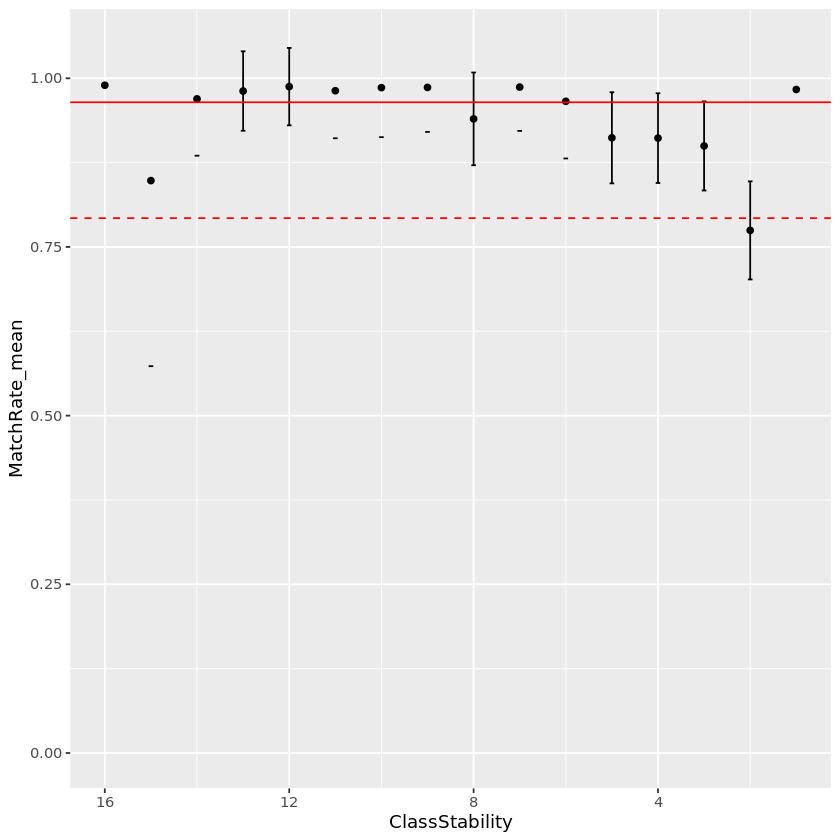

In [88]:
## Visualize Results
ggplot(reclass.res[-1, ], aes(x=ClassStability, y=MatchRate_mean)) + 
    geom_point() + xlim(c(nrow(reclass.res)-1,1)) + 
    ylim(c(0,1.05)) +
    geom_errorbar(aes(ymin=MatchRate_mean-MatchRate_sd, ymax=MatchRate_mean+MatchRate_sd), width=.1) +
    geom_hline(yintercept = reclass.res$MatchRate_mean[1], color="red") +
    geom_hline(yintercept = reclass.res$MatchRate_mean[1]+3*reclass.res$MatchRate_sd[1], color="red",lty=2) +
    geom_hline(yintercept = reclass.res$MatchRate_mean[1]-3*reclass.res$MatchRate_sd[1], color="red",lty=2)

In [89]:
## Finalize negative cell rescue results
final.calls.rescued <- final.calls
rescue.ind <- which(reclass.cells$ClassStability >= 16) ## Note: Value will be dataset-specific
final.calls.rescued[rownames(reclass.cells)[rescue.ind]] <- reclass.cells$Reclassification[rescue.ind]

In [93]:
print(sum(final.calls.rescued == "Negative"))
print(sum(final.calls == "Negative"))

[1] 290
[1] 291


In [95]:
write.table(bar.table, "barTable.csv", sep="\t")

In [108]:
write.table(as.data.frame(final.calls, row.names = names(final.calls)), "demultiplex_annotation.csv", sep = ",")

In [100]:
length(final.calls)

[1] 15608

In [101]:
print(sum(final.calls == "Doublet"))

[1] 2777


In [106]:
as.data.frame(final.calls, row.names = names(final.calls))

,final.calls
,<chr>
AAACCCAAGCGGGTTA,Bar6
AAACCCAAGCGGTAAC,Bar8
AAACCCAAGGGTCACA,Bar8
AAACCCAAGGTCGTAG,Bar1
AAACCCAAGTTTCGAC,Bar4
AAACCCACAAGGATGC,Bar2
AAACCCACACAATTCG,Bar5
AAACCCACACATATGC,Bar8
AAACCCACACGGTCTG,Bar5
